# Stats Mini Project

In [1]:
# Importing all the libraries that maybe required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Question 1. 
You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis, it would be a good idea to check for any hyphens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:


In [2]:
laliga = pd.read_csv('Laliga.csv', header = 1)
display(laliga) # Displaying The DataFrame Imported

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955-56,1955-56,15


In [3]:
laliga.columns # Displaying the column names of the dataframe imported

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

In [4]:
# Dropping the row with team Girona because it's the only row whose data regarding matches is not given.
laliga.drop(index = 60, inplace = True)

In [5]:
# Replacing the '-' in columns with respective values

laliga.loc[laliga['BestPosition'] >= 2,'Champion'] = 0

laliga.loc[laliga['BestPosition'] >= 3,'Runner-up'] = 0

laliga.loc[laliga['BestPosition'] >= 4, 'Third'] = 0

laliga.loc[laliga['BestPosition'] >= 5,'Fourth'] = 0

laliga.loc[laliga['BestPosition'] >= 6,'Fifth'] = 0

laliga.loc[laliga['BestPosition'] >= 7,'Sixth'] = 0

In [6]:
# We see that the column 'T' is equal to the sum of columns from Champion to Sixth.
# So we will replace the remaining '-' with 0 to make it consistent.
laliga.replace({'-':0}, inplace = True)

In [7]:
# Converting the datatype of columns from Points to T to int64
for i in laliga.columns[-4:2:-1]:
    laliga[i] = laliga[i].astype(np.int64)

In [8]:
# Imputing the values of 'T' column
laliga.loc[laliga['T'] == 0, 'T'] = laliga['Champion'] + laliga['Runner-up'] + laliga['Third'] + laliga['Fourth'] + laliga['Fifth'] + laliga['Sixth']

In [9]:
display(laliga[laliga['T'] != 0].tail()) # Checking the dataset after imputing

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
31,32,Sabadell,14,353,426,129,95,202,492,720,0,0,0,1,1,0,2,1943-44,1987-88,4
34,35,Castellon,11,285,334,103,79,152,419,588,0,0,0,1,2,0,3,1941-42,1990-91,4
37,38,Cordoba,9,230,282,82,63,137,285,430,0,0,0,0,1,0,1,1962-63,2014-15,5
44,45,Arenas,7,107,130,43,21,66,227,308,0,0,1,0,3,0,4,1929,1934-35,3
51,52,Real Union,4,56,72,21,14,37,153,184,0,0,0,0,0,1,1,1929,1931-32,6


In [10]:
laliga.info() # Checking the information about columns after imputing and changing the datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            60 non-null     int64 
 1   Team           60 non-null     object
 2   Seasons        60 non-null     int64 
 3   Points         60 non-null     int64 
 4   GamesPlayed    60 non-null     int64 
 5   GamesWon       60 non-null     int64 
 6   GamesDrawn     60 non-null     int64 
 7   GamesLost      60 non-null     int64 
 8   GoalsFor       60 non-null     int64 
 9   GoalsAgainst   60 non-null     int64 
 10  Champion       60 non-null     int64 
 11  Runner-up      60 non-null     int64 
 12  Third          60 non-null     int64 
 13  Fourth         60 non-null     int64 
 14  Fifth          60 non-null     int64 
 15  Sixth          60 non-null     int64 
 16  T              60 non-null     int64 
 17  Debut          60 non-null     object
 18  Since/LastApp  60 non-null     o

In [11]:
laliga.isnull().sum().sum() # Checking for null values in the dataset finally

0

#### Now that we have replaced '-' with respective values in the respective columns and changed the datatypes of numeric columns to int64, we can perform arithmetic operations on them. Also, there are no null values in the dataset.

### 1.1	Which are the teams which started playing between 1930-1980?

In [12]:
# Checking the unique values of the column debut.
sorted(list(laliga.Debut.unique()))

['1929',
 '1930-31',
 '1931-32',
 '1932-33',
 '1933-34',
 '1934-35',
 '1935-36',
 '1939-40',
 '1940-41',
 '1941-42',
 '1943-44',
 '1944-45',
 '1945-46',
 '1947-48',
 '1948-49',
 '1949-50',
 '1950-51',
 '1951-52',
 '1953-54',
 '1955-56',
 '1956-57',
 '1959-60',
 '1960-61',
 '1961-62',
 '1962-63',
 '1963-64',
 '1971-72',
 '1974-75',
 '1977-78',
 '1978-79',
 '1979-80',
 '1987-88',
 '1990-91',
 '1991-92',
 '1994-95',
 '1995-96',
 '1996-97',
 '1998-99',
 '1999-00',
 '2004-05',
 '2007-08',
 '2009-10',
 '2014-15',
 '2016-17']

In [13]:
# Creating another column named Debut_Year (int) by extracting the initial year from the Debut column
laliga['Debut_Year'] = laliga.Debut.apply(lambda x: x.split('-')[0])

In [14]:
# Converting the datatype of new column created to int64
laliga.Debut_Year = laliga.Debut_Year.astype(np.int64)

In [15]:
# Checking the new column created
laliga.Debut_Year.unique()

array([1929, 1931, 1934, 1939, 1932, 1941, 1948, 1944, 1935, 1949, 1933,
       1960, 1951, 1998, 1977, 1959, 2004, 1961, 1940, 1930, 1963, 1974,
       1943, 1987, 1991, 2007, 1962, 1994, 1978, 1971, 1999, 2014, 1990,
       1947, 1996, 1995, 1945, 1953, 1979, 1950, 2016, 2009, 1956, 1955],
      dtype=int64)

#### The teams which started playing between 1930-1980 are :- 

In [16]:
display(laliga[(laliga.Debut_Year >= 1930) & (laliga.Debut_Year <= 1980)][['Team', 'Debut_Year']])

,Team,Debut_Year
3,Valencia,1931
5,Sevilla,1934
8,Zaragoza,1939
9,Real Betis,1932
10,Deportivo La Coruna,1941
11,Celta Vigo,1939
12,Valladolid,1948
14,Sporting Gijon,1944
15,Osasuna,1935
16,Malaga,1949


### 1.2	Which are the top 5 teams in terms of points?

In [17]:
display(laliga.sort_values('Points', ascending = False)[['Team', 'Points']][:5])

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


### 1.3	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [18]:
#Creating a column of winning percentage
laliga['Win_Percent'] = round((laliga.GamesWon / laliga.GamesPlayed) * 100, 2)

In [19]:
display(laliga.tail()[['Team', 'Win_Percent']])

,Team,Win_Percent
55,Leganes,21.05
56,Xerez,21.05
57,Condal,23.33
58,Atletico Tetuan,23.33
59,Cultural Leonesa,16.67


#### The distribution of the winning percentage for all teams:

In [20]:
display(laliga[['Team', 'GamesPlayed', 'GamesWon', 'Win_Percent']])

,Team,GamesPlayed,GamesWon,Win_Percent
0,Real Madrid,2762,1647,59.63
1,Barcelona,2762,1581,57.24
2,Atletico Madrid,2614,1241,47.48
3,Valencia,2664,1187,44.56
4,Athletic Bilbao,2762,1209,43.77
5,Sevilla,2408,990,41.11
6,Espanyol,2626,948,36.10
7,Real Sociedad,2302,864,37.53
8,Zaragoza,1986,698,35.15
9,Real Betis,1728,606,35.07


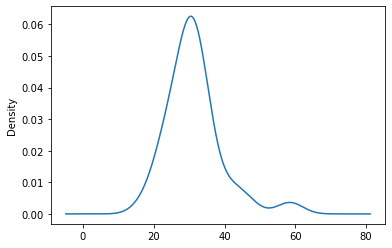

In [21]:
laliga['Win_Percent'].plot(kind = 'density')
plt.show()

#### We can see from the density plot of Win_Percent Distributions of the teams that it is kind of normal in nature with some right skewness. This is due to high winning percentage of a few teams.

#### Top 5 Teams in terms of winning percentage:

In [22]:
display(laliga.sort_values('Win_Percent', ascending = False)[['Team', 'GamesPlayed', 'GamesWon', 'Win_Percent']][:5])

,Team,GamesPlayed,GamesWon,Win_Percent
0,Real Madrid,2762,1647,59.63
1,Barcelona,2762,1581,57.24
2,Atletico Madrid,2614,1241,47.48
3,Valencia,2664,1187,44.56
4,Athletic Bilbao,2762,1209,43.77


### 1.4	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7?

In [23]:
# Extracting the teams with best position between 1-3 and 4-7 into a new dataframe for ANOVA.
bestpos_1to7_win = laliga[(laliga.BestPosition <= 3) | ((laliga.BestPosition >= 4) & (laliga.BestPosition <= 7))][
    ['Team', 'BestPosition', 'Win_Percent']]

In [24]:
# Categorizing the teams with best position between 1-3 and 4-7 into 2 categories
bestpos_1to7_win['Category'] = bestpos_1to7_win['BestPosition'].map({1:'1-3', 2:'1-3', 3:'1-3',
                                                                    4:'4-7', 5:'4-7', 6:'4-7', 7:'4-7'})

In [25]:
display(bestpos_1to7_win) # Checking the dataframe formed

,Team,BestPosition,Win_Percent,Category
0,Real Madrid,1,59.63,1-3
1,Barcelona,1,57.24,1-3
2,Atletico Madrid,1,47.48,1-3
3,Valencia,1,44.56,1-3
4,Athletic Bilbao,1,43.77,1-3
5,Sevilla,1,41.11,1-3
6,Espanyol,3,36.10,1-3
7,Real Sociedad,1,37.53,1-3
8,Zaragoza,2,35.15,1-3
9,Real Betis,1,35.07,1-3


#### Defining Null Hypothesis H0: There is no significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

#### Defining Alternate Hypothesis H1: There is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

#### Level of Significance = 5% (0.05)

In [26]:
# Performing ANOVA
model = ols('Win_Percent ~ Category', data = bestpos_1to7_win).fit()
print(sm.stats.anova_lm(model))

            df       sum_sq     mean_sq          F    PR(>F)
Category   1.0   834.059808  834.059808  24.927181  0.000015
Residual  36.0  1204.554699   33.459853        NaN       NaN


#### Conclusion: Since the p-value 0.000015 is quite less than the alpha 0.05, we reject the null hypothesis H0 with sufficient evidence meaning that there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

## Question 2 
A study was done to measure the blood pressure of 60-year-old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

In [27]:
n = 200 # Sample Size
xbar = 140 # Sample Mean
s = 25 # Sample Standard Deviation

### a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [28]:
se = s / np.sqrt(n) # Standard Error
print("Standard Error = ", se)

Standard Error =  1.7677669529663687


### b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [29]:
print("95% Confidence Interval = ", stats.norm.interval(0.95, xbar, se))

95% Confidence Interval =  (136.5352404391258, 143.4647595608742)


### c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [30]:
#New Sample Size
n = 100

#New Standard Error
se = s / np.sqrt(n)
print("New Standard Error :", se)

New Standard Error : 2.5


In [31]:
#New Confidence Interval
print(stats.norm.interval(0.95, xbar, se))

(135.10009003864985, 144.89990996135015)


### d)	Which of the two above intervals are wider?

#### The interval with the sample size 100 is wider

### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

#### The size (n) of a statistical sample affects the standard error for that sample. Because n is in the denominator of the standard error formula, the standard error decreases as n increases. It makes sense that having more data gives less variation (and more precision) in your results.

## Question 3
Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [32]:
golf = pd.read_csv('Golf.csv') # Importing the dataset
display(golf) # displaying the dataset

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


### 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

#### Null Hypothesis H0: There is no significant difference between the driving distances of the current and new golf balls.

#### Alternate Hypothesis H1: There is a significant difference between the driving distances of the current and new golf balls.

#### Level of Significance: 0.05

#### Test: ANOVA - We will perform the ANOVA Test because we need to compare the characterestic of 2 different groups.

In [33]:
#Creating a new dataframe to perform ANOVA

golf1 = pd.DataFrame()
golf1 = golf1.append(pd.DataFrame({'Ball':'Current', 'Distance':golf['Current'].values}))
golf1 = golf1.append(pd.DataFrame({'Ball':'New', 'Distance':golf['New'].values}))

#Checking the dataframe created
display(golf1)

,Ball,Distance
0,Current,264
1,Current,261
2,Current,267
3,Current,272
4,Current,258
...,...,...
35,New,263
36,New,261
37,New,255
38,New,263


### 2.	Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [34]:
model = ols('Distance ~ Ball', data = golf1).fit() # Building the model

#Printing the details of the ANOVA test
print(sm.stats.anova_lm(model))

            df     sum_sq     mean_sq         F    PR(>F)
Ball       1.0   154.0125  154.012500  1.764545  0.187932
Residual  78.0  6807.9750   87.281731       NaN       NaN


#### Conclusion: The p-value is 0.18 which is more than the alpha 0.05. Hence, we fail to reject the null hypothesis meaning that there is no significant difference the driving distance of the current and the new golf balls.

#### Recommendation: Since there is no significant difference between the driving distance of the current and the new golf balls, we recommend Par Inc. to launch the new cut-resistant golf ball so that their market can be increased. Because there is no such effect of the new coating on the driving distance of the new golf balls.

### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [35]:
xbar_current = golf['Current'].mean() # Sample mean of the current model
s_current = golf['Current'].std() # Sample standard deviation of current model
se_current = s_current / np.sqrt(n)

n = 40 # Sample size

xbar_new = golf['New'].mean() # Sample mean of new model
s_new = golf['New'].std() # Sample standard deviation of new model
se_new = s_new / np.sqrt(n)

#### The 95% confidence interval for the population mean of current  model

In [36]:
print(stats.norm.interval(0.95, xbar_current, se_current))

(268.5594464958561, 271.99055350414386)


#### The 95% confidence interval for the population mean of new model

In [37]:
print(stats.norm.interval(0.95, xbar_new, se_new))

(264.43297388933604, 270.56702611066396)


#### The 95% confidence interval for the difference between the means of the two population

In [38]:
print(stats.norm.interval(0.95, (golf['Current'] - golf['New']).mean(), (golf['Current'] - golf['New']).std() / np.sqrt(n)))

(-1.4842231065685705, 7.03422310656857)


# THE END!